<a href="https://colab.research.google.com/github/jeshwanth-reddi/Medical-Insurance-Cost-Prediction/blob/master/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dependences**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


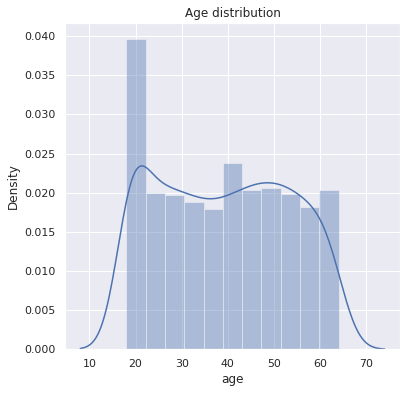

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

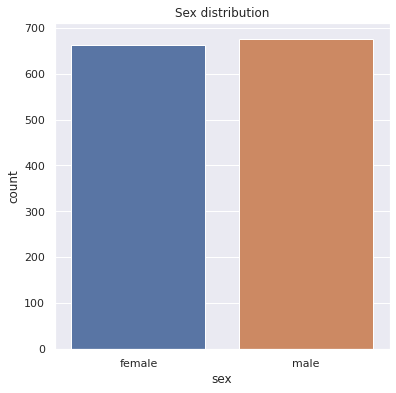

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


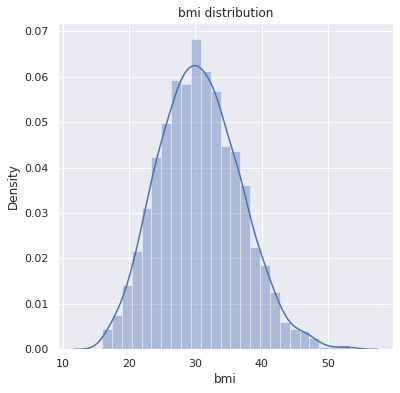

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

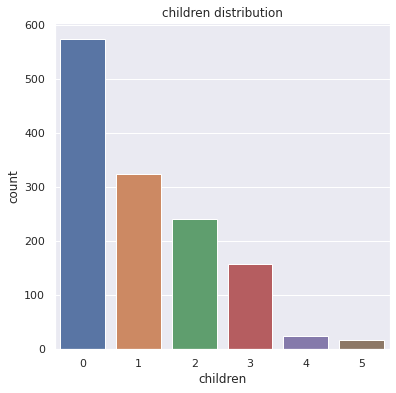

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children distribution')
plt.show()

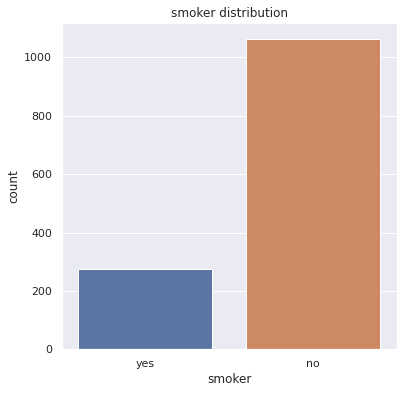

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker distribution')
plt.show()

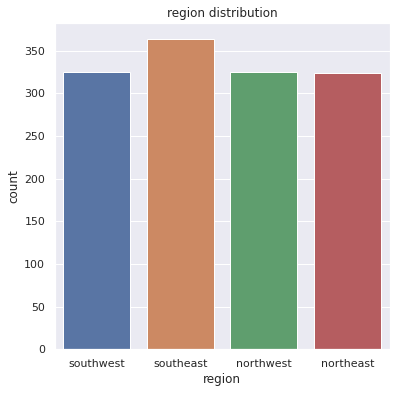

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('region distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


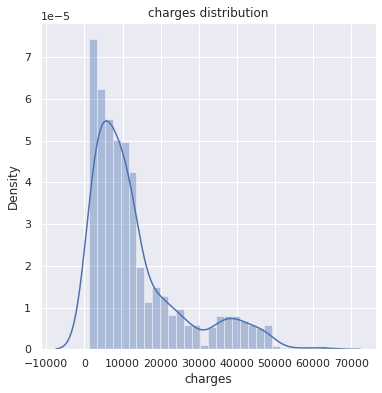

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [ ]:
df.replace({'sex':{'male':0,'female':1}},inplace=True) 
df.replace({'smoker':{'no':0,'yes':1}},inplace=True) 
df.replace({'region ':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [ ]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [ ]:
print(x.shape,y.shape)

(1338, 6) (1338,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
testing_data_prediction =regressor.predict(x_test)

In [ ]:
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('accuracy : ', r2_test)

accuracy :  0.7447273869684077


In [ ]:
training_data_prediction =regressor.predict(x_train)

In [ ]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('accuracy : ', r2_train)

R squared vale :  0.751505643411174


In [ ]:
#id = (31,1,25.74,0,1,0)
id = (31,1,25.74,0,0,0)
#id = (56,0,40.3,0,0,3)

iarray = np.asarray(id)
ire= iarray.reshape(1,-1)
prediction = regressor.predict(ire)
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3760.080576496064


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
